# Import dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as seaborn

# Extract the file and read the csv

In [2]:
# Extract the file
source_csv = "guns.csv"

# Read the csv 
source_df = pd.read_csv(source_csv, encoding="ISO-8859-1")

# Show raw dataset
source_df.head()
# source_df.count()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


# Clean dataset and drop unnecessary columns

In [5]:
# Drop missing data
source_df = source_df.dropna(how="any")
# source_df.count()

# Drop unnecessary columns
source_df.drop(['Unnamed: 0', 'hispanic'], axis=1, inplace=True)
source_df.head()
# source_df.count()

# Create a new column for date and filter data

In [3]:
# Filter by year and month
calendar_date = source_df.sort_values(['year', 'month'])
# calendar_date.head()

# Create new column for date and count of each gun-death incident
import datetime
calendar_date['date'] = pd.to_datetime((calendar_date['year'] * 10000 + calendar_date['month'] * 100 + 1).apply(str),format='%Y%m%d')

import calendar
monthly_rates = pd.DataFrame(calendar_date.groupby('date').size(), columns=['Count'])
monthly_rates = monthly_rates.reset_index()
monthly_rates.head()

,date,Count
0,2012-01-01,2758
1,2012-02-01,2357
2,2012-03-01,2743
3,2012-04-01,2795
4,2012-05-01,2999


# Plot Unique Date Information

C:\Users\19044\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


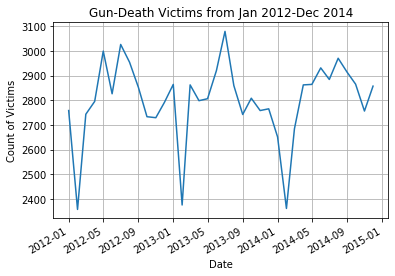

In [4]:
# Create line chart of data
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(monthly_rates.date, monthly_rates.Count)

# Format the graph
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Gun-Death Victims from Jan 2012-Dec 2014')
plt.xlabel('Date')
plt.ylabel('Count of Victims')
plt.grid(True)

# plt.savefig('Line_Date_Counts.png')

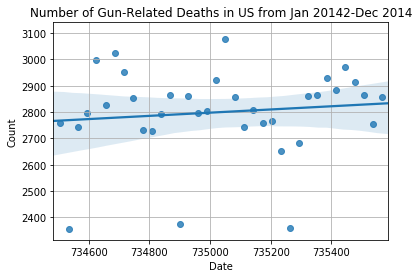

In [5]:
# Create scatter plot with ordinal dates in order to have regression line
monthly_rates['date_ordinal'] = pd.to_datetime(monthly_rates['date']).apply(lambda date: date.toordinal())
ax = seaborn.regplot(
    data=monthly_rates,
    x='date_ordinal',
    y='Count',
)

ax.set_xlim(monthly_rates['date_ordinal'].min() - 20, monthly_rates['date_ordinal'].max() + 20)
# ax.set_ylim(0, monthly_rates['Count'].max() + 1)

ax.set_xlabel('Date')
plt.title("Number of Gun-Related Deaths in US from Jan 20142-Dec 2014")
plt.grid(True)

# plt.savefig('Scatter_Line_Date_Counts.png')

# Filter clean dataset focusing on "month" and "year" of source dataset

In [10]:
# Filter clean dataset focusing on "month" and "year" of source dataset
date_df = source_df.loc[:,['month', 'year']]
date_df.head()

,month,year
0,1,2012
1,1,2012
2,1,2012
3,2,2012
4,2,2012


# Filter down to focus on the column of "month"

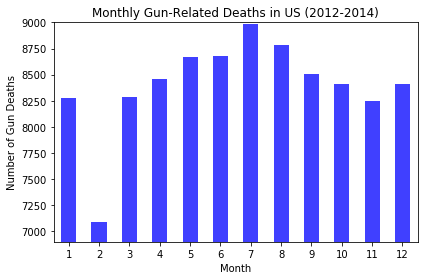

In [11]:
# Value counts of the month column
month_count = date_df["month"].value_counts().sort_index()
# month_count

# Chart of gun-related deaths per month
month_count.plot(kind="bar", facecolor="blue", alpha=0.75, align="center")

# Set textual properties
plt.title("Monthly Gun-Related Deaths in US (2012-2014)")
plt.ylabel("Number of Gun Deaths")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.ylim(6900, 9000)
plt.tight_layout()
# plt.show()
# plt.savefig('Bar_Monthly_Counts.png')

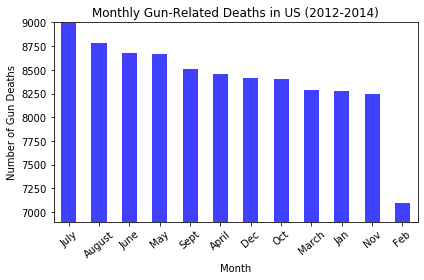

In [13]:
# Show chart with month names, and from ascending to descending order 

# Create bins for months
bins = [0, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12]
group_names = ["Jan", "Feb", "March", "April", "May", "June", "July", 
             "August", "Sept", "Oct", "Nov", "Dec"]
date_df["actual_month"] = pd.cut(date_df["month"], bins, labels=group_names)
month_df = date_df["actual_month"]
month_df = month_df.value_counts()
# month_df 
# month_df.describe()

# Chart of gun-related deaths per month with the binned names
month_df.plot(kind="bar", facecolor="blue", alpha=0.75, align="center")
# Set chart properties
plt.title("Monthly Gun-Related Deaths in US (2012-2014)")
plt.ylabel("Number of Gun Deaths")
plt.xlabel("Month")
plt.xticks(rotation=400)
plt.ylim(6900, 9000)
plt.tight_layout()
# plt.show()
# plt.savefig('Bar_Named_Monthly_Counts.png')

# Filter to focus on the column of  "year"

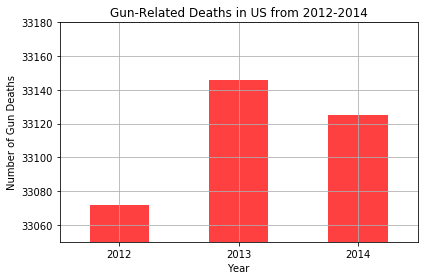

In [19]:
year_count = date_df["year"].value_counts().sort_index()
# year_count.describe()
# year_count

# Chart of gun-related deaths per year
year_count.plot(kind="bar", facecolor="red", alpha=0.75, align="center")

# Set textual properties
plt.title("Gun-Related Deaths in US from 2012-2014")
plt.ylabel("Number of Gun Deaths")
plt.xlabel("Year")
plt.xticks(rotation=0)

plt.ylim(33050, 33180)
plt.tight_layout()
plt.grid(True)

# plt.show()
# plt.savefig('Bar_Yearly_Counts.png')